theta[-2.62051156  0.76037153  1.17194672]


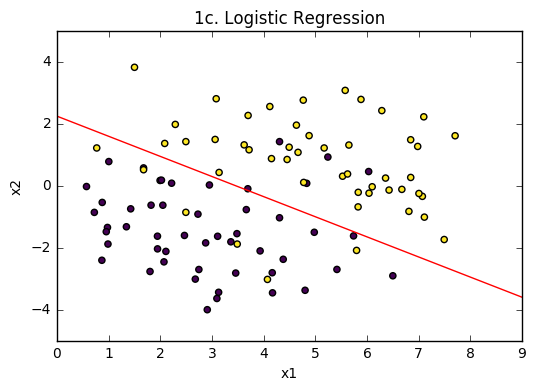

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def main():
    x = np.loadtxt('logistic_x.txt')
    y = np.loadtxt('logistic_y.txt')
    n = x.shape[0]
    p = x.shape[1]
    
    theta = np.zeros(np.add(p,1))
    
    x = np.hstack((np.ones((n,1)),x))

    delta = 1e-20  #tolerance for convergence
    change = 99999 #value to test convergence, initialize to large value
    i = 0
    
    while change > delta:
        oldloss = get_loss(x,y,theta)
        theta = np.subtract(theta,np.dot(np.dot(np.linalg.inv(get_hessian(x, theta)), get_gradient(x,y,theta)), get_loss(x,y,theta)))
        i = i+1
        newloss = get_loss(x,y,theta)
        change = oldloss - newloss

    print("theta"+ str(theta))
    plt.scatter(x=x[:,1], y=x[:,2], c=y, cmap='viridis')
    
    a = np.arange(0,10)
    b = np.divide(np.subtract(np.negative(theta[0]), np.multiply(theta[1], a)),theta[2])
    
    plt.plot(a, b, 'r-')
    plt.axis([0,9,-5,5])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('1c. Logistic Regression')
    plt.savefig('ps1-1c.png')

def get_loss(x,y,theta):
    return np.divide(np.sum(np.log(np.add(1, np.exp(np.multiply(np.negative(y), np.dot(x, theta)))))), x.shape[0])

def sigmoid(z):
    return np.divide(1, np.add(1,np.exp(np.negative(z))))

def get_gradient(x,y,theta):
    return np.divide(np.dot(np.multiply(sigmoid(np.multiply(np.negative(y),np.dot(x,theta))), y), x), x.shape[0])

def get_hessian(x, theta):
    scale = np.multiply(sigmoid(np.dot(x,theta)), np.subtract(1, sigmoid(np.dot(x,theta)))) 
    n = x.shape[0]
    p = x.shape[1]
    hess = np.zeros((p, p))
    for i in range(0,n):
        hess = np.add(hess, np.multiply(np.outer(x[i,], x[i,]), scale[i,]))
    return np.divide(hess, np.negative(n))

if __name__ == "__main__":
    main()